#**The Spark Foundation: Data Science and Business Analytics Internship**



## **Task1: Student Score Prediction by their study hours using Supervised learning.**

### Author: Syed Ameen Ikhlaas H.

## **Importing required Libraries**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## **Importing the Dataset**

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head(10)   #Data has Sucessfully imported

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Exploratory Data Analysis(EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()    #This is just for Confirmation whether there is null values or not, in this case there are none

Hours     0
Scores    0
dtype: int64

In [6]:
df.shape

(25, 2)

In [7]:
df.describe()    # For calculating some statistical data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


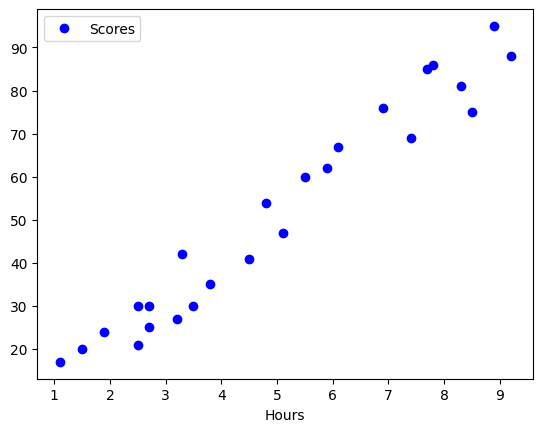

In [8]:
#Let plot some graphs
df.plot(x = 'Hours', y='Scores', style = 'o', color = 'blue')
plt.xlabel = 'Hours'
plt.ylabel = 'Scores'
plt.title = 'Hours VS Scores'

Based on the graph, there is a positive correlation between studying hours and scores. This means that as the number of hours dedicated to studying increases, the scores also increase.

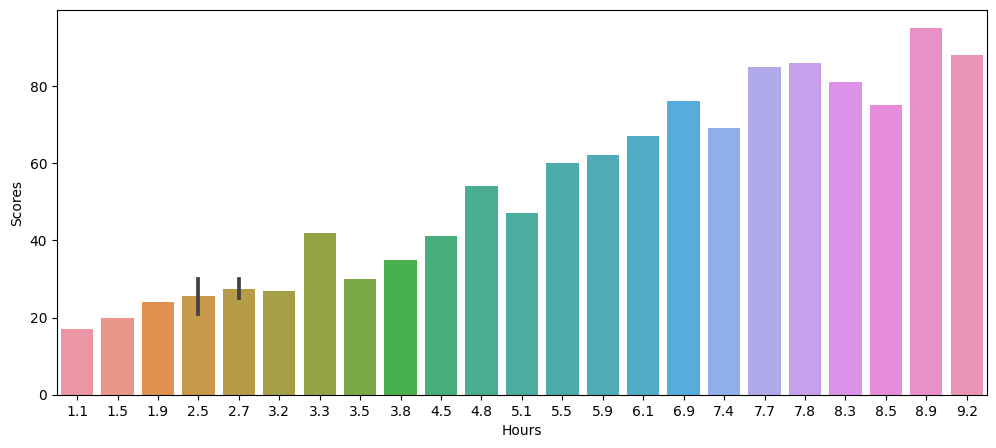

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data =df, x ='Hours', y ='Scores',ax=ax)
plt.show()

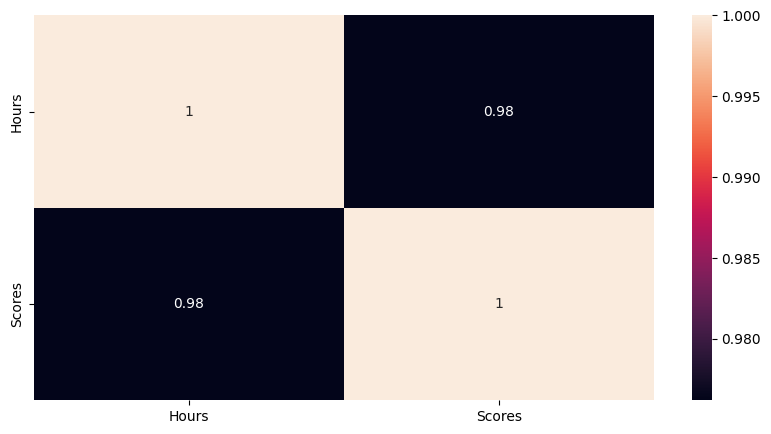

In [10]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

From this heatmap we can confirm positive correlation

## **Splitting the Dataset into train and test Dataset**


In [11]:
X = df.drop('Scores',axis=1)  
y = df['Scores']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(25, 1) (20, 1) (5, 1)
(25,) (20,) (5,)


## **Model Building**

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### **Making prediction**

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


## **Plotting the Regression Line**

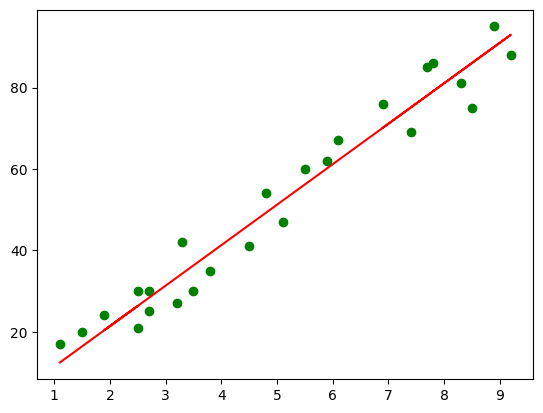

In [17]:
plt.scatter(X, y, color='g')
plt.plot(X_test, y_pred, color='r')
plt.show()

In [18]:
#Line Equation
print('Regression Coefficient: ',regressor.coef_)
print('Regression Intercept: ',regressor.intercept_)

Regression Coefficient:  [9.94061514]
Regression Intercept:  1.5079104828268939


* Equation of Line 
*   y=mx+c

     y = 9.941*Hours + 1.508

## **Model Evaluation**

In [19]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.877039354964476
Mean Squared Error: 24.387620339856596
Root Mean Squared Error: 2.2084019912517006
R2: 0.9735538080811826


### What will be the predicted score if a student studies for 9.25 hrs/day?

In [20]:
input_data = (9.25)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[93.45860056]


In [21]:
#We can also predict value using line equation
# y = 9.941*Hours + 1.508

print((9.941*9.25) + 1.508)


93.46225
